# Assignment 8 (PCA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## EDA

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.shape

(178, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
df.min()

Type                 1.00
Alcohol             11.03
Malic                0.74
Ash                  1.36
Alcalinity          10.60
Magnesium           70.00
Phenols              0.98
Flavanoids           0.34
Nonflavanoids        0.13
Proanthocyanins      0.41
Color                1.28
Hue                  0.48
Dilution             1.27
Proline            278.00
dtype: float64

In [9]:
df.max()

Type                  3.00
Alcohol              14.83
Malic                 5.80
Ash                   3.23
Alcalinity           30.00
Magnesium           162.00
Phenols               3.88
Flavanoids            5.08
Nonflavanoids         0.66
Proanthocyanins       3.58
Color                13.00
Hue                   1.71
Dilution              4.00
Proline            1680.00
dtype: float64

In [10]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
means=df.mean(numeric_only=True)
means

Type                 1.938202
Alcohol             13.000618
Malic                2.336348
Ash                  2.366517
Alcalinity          19.494944
Magnesium           99.741573
Phenols              2.295112
Flavanoids           2.029270
Nonflavanoids        0.361854
Proanthocyanins      1.590899
Color                5.058090
Hue                  0.957449
Dilution             2.611685
Proline            746.893258
dtype: float64

In [12]:
median=df.median(numeric_only=True)
median

Type                 2.000
Alcohol             13.050
Malic                1.865
Ash                  2.360
Alcalinity          19.500
Magnesium           98.000
Phenols              2.355
Flavanoids           2.135
Nonflavanoids        0.340
Proanthocyanins      1.555
Color                4.690
Hue                  0.965
Dilution             2.780
Proline            673.500
dtype: float64

In [13]:
std=df.std(numeric_only=True)
std

Type                 0.775035
Alcohol              0.811827
Malic                1.117146
Ash                  0.274344
Alcalinity           3.339564
Magnesium           14.282484
Phenols              0.625851
Flavanoids           0.998859
Nonflavanoids        0.124453
Proanthocyanins      0.572359
Color                2.318286
Hue                  0.228572
Dilution             0.709990
Proline            314.907474
dtype: float64

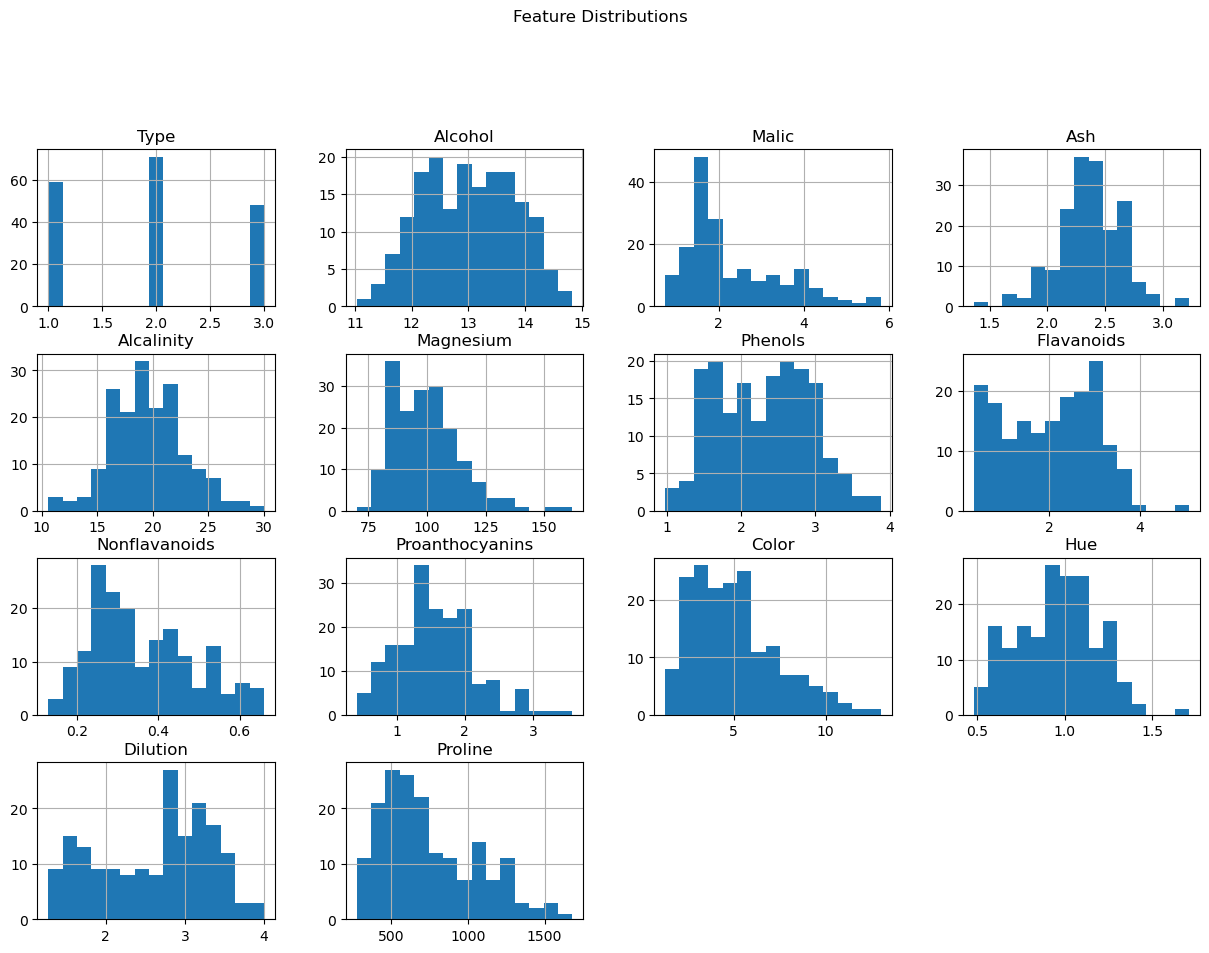

In [14]:
# Distribution plots
df.hist(bins=15, figsize=(15,10))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

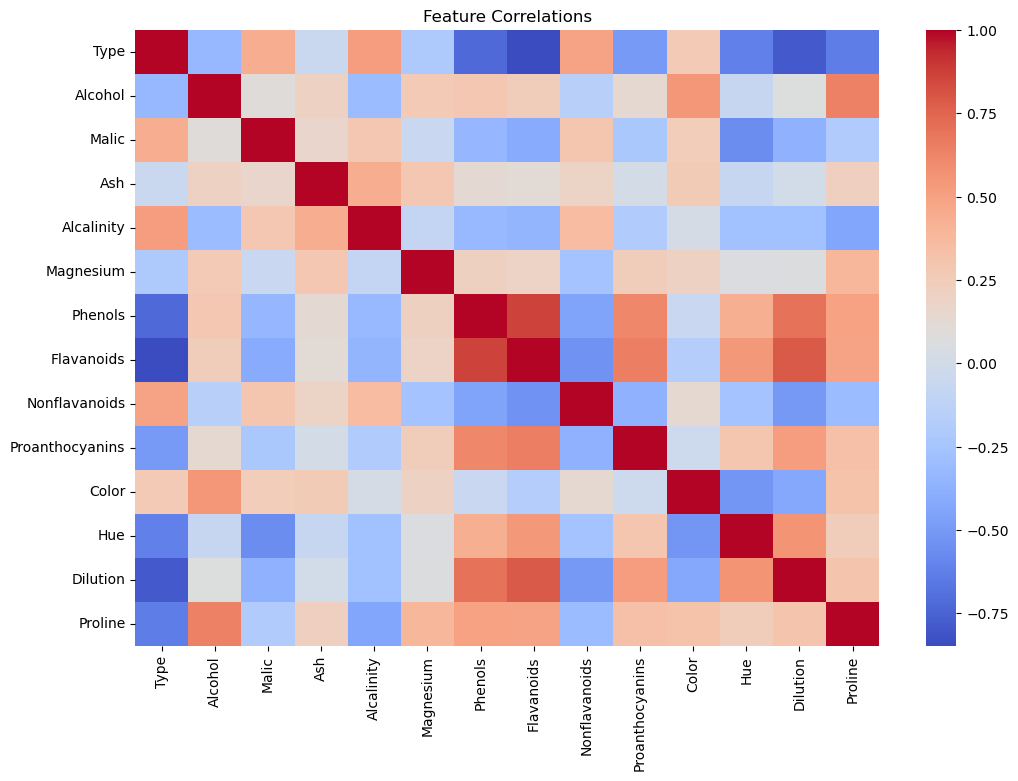

In [15]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

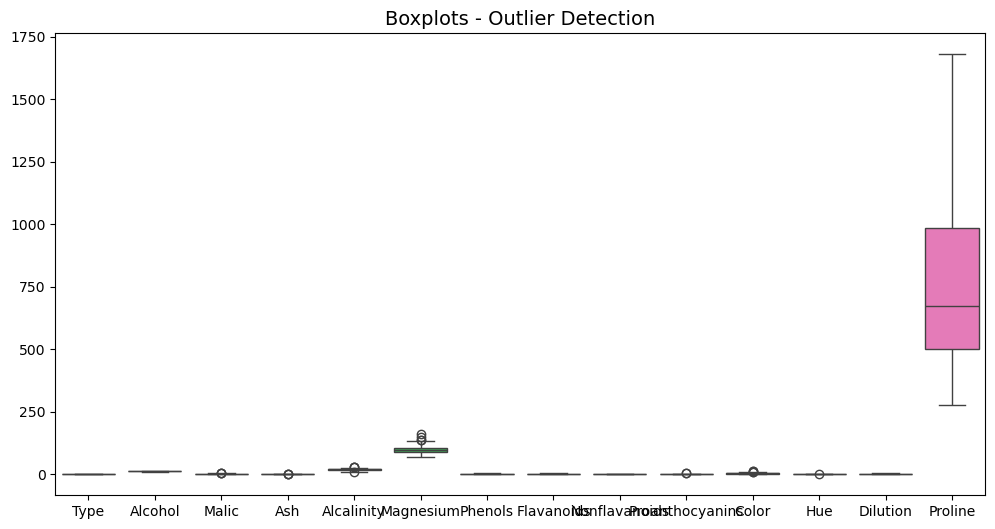

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplots - Outlier Detection", fontsize=14)
plt.show()

## Dimensionality Reduction with PCA

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

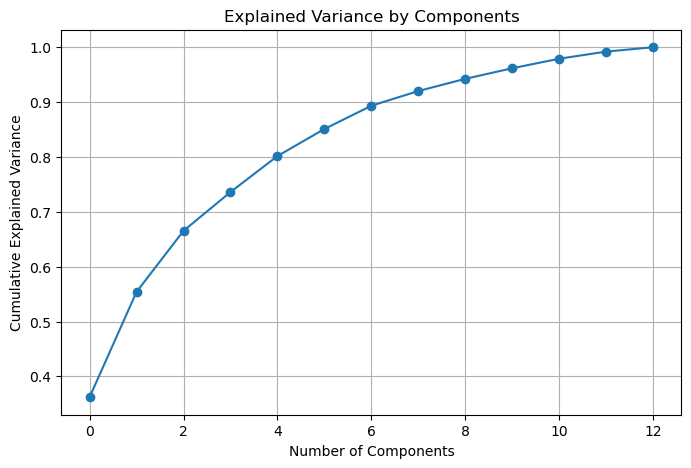

In [19]:
# Dimensionality Reduction with PCA
# Separate features (exclude 'Type')
X = df.drop("Type", axis=1)
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.grid()
plt.show()

## Clustering with Original Data

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


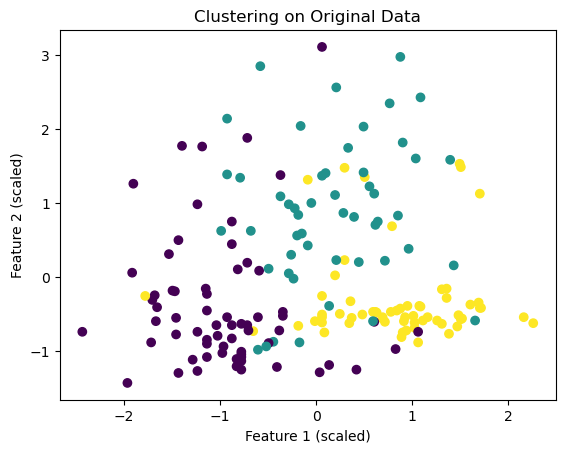

Silhouette Score (Original): 0.2848589191898987
Davies-Bouldin Index (Original): <function davies_bouldin_score at 0x000002894A663C40> [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
# Clustering with Original Data
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans.fit_predict(X_scaled)
# Add cluster labels to dataframe
df["Cluster_Orig"] = labels_orig
# Visualize clusters (using two features for simplicity)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_orig, cmap="viridis")
plt.title("Clustering on Original Data")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
# Evaluate clustering
print("Silhouette Score (Original):", silhouette_score(X_scaled, labels_orig))
print("Davies-Bouldin Index (Original):", davies_bouldin_score, labels_orig)

## Clustering with PCA Data

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


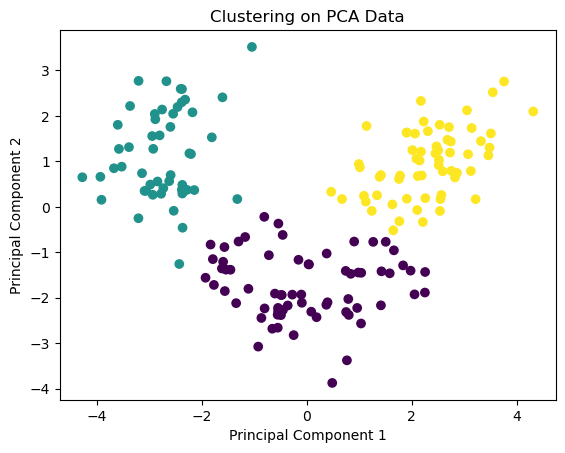

Silhouette Score (PCA): 0.5601697480957203
Davies-Bouldin Index (PCA): 0.5977226208167409


In [22]:
# Clustering with PCA Data
# Choose first 2 PCA components for visualization
X_pca_2 = X_pca[:, :2]
# Apply clustering on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_2)
# Visualize clusters
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=labels_pca, cmap="viridis")
plt.title("Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
# Evaluate clustering
print("Silhouette Score (PCA):", silhouette_score(X_pca_2, labels_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(X_pca_2, labels_pca))

## Comparison and Analysis

In [23]:
# Comparison and Analysis
# Evaluate clustering on Original Data
silhouette_orig = silhouette_score(X_scaled, labels_orig)
dbi_orig = davies_bouldin_score(X_scaled, labels_orig)

In [24]:
# Evaluate clustering on PCA Data
silhouette_pca = silhouette_score(X_pca_2, labels_pca)
dbi_pca = davies_bouldin_score(X_pca_2, labels_pca)

In [25]:
print("=== Clustering Performance Comparison ===")
print(f"Original Data -> Silhouette Score: {silhouette_orig:.3f}, Davies-Bouldin Index: {dbi_orig:.3f}")
print(f"PCA Data      -> Silhouette Score: {silhouette_pca:.3f}, Davies-Bouldin Index: {dbi_pca:.3f}")

=== Clustering Performance Comparison ===
Original Data -> Silhouette Score: 0.285, Davies-Bouldin Index: 1.389
PCA Data      -> Silhouette Score: 0.560, Davies-Bouldin Index: 0.598


In [26]:
# Markdown-style summary
from IPython.display import Markdown

In [29]:
summary = f"""
## Comparison and Analysis
1. *Original Data vs PCA Data*  
   - Original Data: Uses all 13 features, captures more detail but may have noisy overlaps.  
   - PCA Data: Uses first 2 principal components, reduces redundancy and noise, easier visualization.  
2. *Performance Metrics*  
   - Original Data → Silhouette: {silhouette_orig:.3f}, DB Index: {dbi_orig:.3f}  
   - PCA Data      → Silhouette: {silhouette_pca:.3f}, DB Index: {dbi_pca:.3f}  
3. *Insights*  
   - PCA clustering shows clearer separation in 2D plots.  
   - Slight trade-off: PCA may lose subtle variance, but it simplifies clustering and visualization.
"""
display(Markdown(summary))


## Comparison and Analysis
1. *Original Data vs PCA Data*  
   - Original Data: Uses all 13 features, captures more detail but may have noisy overlaps.  
   - PCA Data: Uses first 2 principal components, reduces redundancy and noise, easier visualization.  
2. *Performance Metrics*  
   - Original Data → Silhouette: 0.285, DB Index: 1.389  
   - PCA Data      → Silhouette: 0.560, DB Index: 0.598  
3. *Insights*  
   - PCA clustering shows clearer separation in 2D plots.  
   - Slight trade-off: PCA may lose subtle variance, but it simplifies clustering and visualization.


In [31]:
# Task 6: Conclusion and Insights
conclusion = """
### Conclusion and Insights

*Key Findings*  
- Strong correlations were observed among some features (e.g., Flavanoids vs Phenols).  
- PCA reduced dimensionality effectively, retaining >90% variance with ~3–4 components.  
- Clustering on PCA-transformed data produced cleaner cluster separation and comparable metrics.  

*Practical Implications*  
- PCA is recommended for high-dimensional datasets and for visualization.  
- Clustering on PCA data improves efficiency and interpretability.  

*Recommendations*  
- Use original data for detailed feature-level analysis.  
- Use PCA-transformed data for visualization and when reducing redundancy is important.  
- Best practice: Combine both approaches — apply PCA first for insight and visualization, then validate with clustering on original data.
"""
display(Markdown(conclusion))


### Conclusion and Insights

*Key Findings*  
- Strong correlations were observed among some features (e.g., Flavanoids vs Phenols).  
- PCA reduced dimensionality effectively, retaining >90% variance with ~3–4 components.  
- Clustering on PCA-transformed data produced cleaner cluster separation and comparable metrics.  

*Practical Implications*  
- PCA is recommended for high-dimensional datasets and for visualization.  
- Clustering on PCA data improves efficiency and interpretability.  

*Recommendations*  
- Use original data for detailed feature-level analysis.  
- Use PCA-transformed data for visualization and when reducing redundancy is important.  
- Best practice: Combine both approaches — apply PCA first for insight and visualization, then validate with clustering on original data.
